Week 3 Assignment - by Todd Livergood
September 25, 2019

1.)  First import all libraries that I might be using

In [1]:
import statistics as stats
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

2.) Read in .csv file and put into dataframe

In [3]:
df = pd.read_csv("titanic_dataset.csv")

3.) There are a few variables where we know we don't need.  Intuitively these would not be expected
to have any predicive value to survival; Going to drop those.

In [4]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

4.) There are various minipulations we need to do to some of the data first:

4a.)  Replace blank age values with median values

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)

4b.) Transform the Embarked variable because it's categorical, using dummy indicators

In [6]:
dummy_ranks = pd.get_dummies(df['Embarked'], prefix='Loc_Embarked')
df = df.join(dummy_ranks.drop("Loc_Embarked_S", axis=1))
df.drop("Embarked", axis=1, inplace=True)

4c.) We also want to transform the Sex variable to numeric

In [7]:
dummy_ranks2 = pd.get_dummies(df['Sex'], prefix='Sex_')
df = df.join(dummy_ranks2.drop("Sex__female", axis=1))
df.drop("Sex", axis=1, inplace=True)

5.)  Next, assign test and train datasets, and add constnt term to both X datasets

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Survived', axis=1),df['Survived'],test_size=0.2, random_state=156)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


C:\Users\Todd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


6.) Now fit the logistic regression model and view the results

In [9]:
model1 = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result=model1.fit()
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            644.0365  
Link Function:      logit            BIC:            -3991.3222
Dependent Variable: Survived         Log-Likelihood: -313.02   
Date:               2019-09-25 12:16 LL-Null:        -472.54   
No. Observations:   712              Deviance:       626.04    
Df Model:           8                Pearson chi2:   728.      
Df Residuals:       703              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           5.0427   0.6074   8.3018 0.0000  3.8522  6.2332
Pclass         -1.1522   0.1631  -7.0626 0.0000 -1.4720 -0.8325
Age            -0.0404   0.0086  -4.6839 0.0000 -0.0574 -0.0235
SibSp          -0.3267   0.1221  -2.6757 0.0075 -0.5661

The AIC is 644.0365, and the Deviance is 626.04.  It looks like there are a few predictors
whose p-value is above 0.05, indicating that these aren't significant at the 5% confidence level.  We'll use Backward Elimination to remove the ones with the highest p-values first, and refit model each time to see how it looks.

6a.) Will eliminate the "Fare" predictor, at 5% confidence level it is insignificant

In [10]:
X_train.drop("Fare", axis=1, inplace=True)
print(sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit().summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            642.0908  
Link Function:      logit            BIC:            -3997.8361
Dependent Variable: Survived         Log-Likelihood: -313.05   
Date:               2019-09-25 12:16 LL-Null:        -472.54   
No. Observations:   712              Deviance:       626.09    
Df Model:           7                Pearson chi2:   728.      
Df Residuals:       704              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           5.0972   0.5604   9.0950 0.0000  3.9988  6.1957
Pclass         -1.1703   0.1434  -8.1591 0.0000 -1.4515 -0.8892
Age            -0.0406   0.0086  -4.7048 0.0000 -0.0575 -0.0237
SibSp          -0.3237   0.1214  -2.6656 0.0077 -0.5617

6b.) Will eliminate the "Embarked from Queenstown" predictor, at 5% confidence level it is insignificant

In [11]:
X_train.drop("Loc_Embarked_Q", axis=1, inplace=True)
print(sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit().summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            640.6128  
Link Function:      logit            BIC:            -4003.8821
Dependent Variable: Survived         Log-Likelihood: -313.31   
Date:               2019-09-25 12:17 LL-Null:        -472.54   
No. Observations:   712              Deviance:       626.61    
Df Model:           6                Pearson chi2:   722.      
Df Residuals:       705              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           5.0901   0.5605   9.0817 0.0000  3.9916  6.1886
Pclass         -1.1490   0.1400  -8.2043 0.0000 -1.4235 -0.8745
Age            -0.0403   0.0086  -4.6788 0.0000 -0.0572 -0.0234
SibSp          -0.3303   0.1216  -2.7155 0.0066 -0.5687

6c.) Will eliminate the "# of parents/children aboard the Titanic" predictor, at 5% confidence level it is insignificant

In [12]:
X_train.drop("Parch", axis=1, inplace=True)
model_final = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result2=model_final.fit()
print(result2.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            639.3582  
Link Function:      logit            BIC:            -4009.7048
Dependent Variable: Survived         Log-Likelihood: -313.68   
Date:               2019-09-25 12:17 LL-Null:        -472.54   
No. Observations:   712              Deviance:       627.36    
Df Model:           5                Pearson chi2:   725.      
Df Residuals:       706              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           5.0312   0.5561   9.0472 0.0000  3.9413  6.1212
Pclass         -1.1513   0.1402  -8.2120 0.0000 -1.4261 -0.8765
Age            -0.0399   0.0086  -4.6569 0.0000 -0.0568 -0.0231
SibSp          -0.3602   0.1174  -3.0681 0.0022 -0.5902

6d.) Now all remaining variables are significant.  The updated AIC (639.36) came down by about 5 points from the original run.  The updated Deviance (627.36) is a tick higher from original run.  
I want to interpret the coefficients (I think it makes more sense to take the exponent of them).

In [13]:
np.exp(result2.params)

const             153.118334
Pclass              0.316222
Age                 0.960842
SibSp               0.697569
Loc_Embarked_C      1.746712
Sex__male           0.062213
dtype: float64

Here are some interpretation of these coefficients (with exponent of coefficients in parenthesis):

Pclass(0.316):  As class# goes up a unit (which means lower class), the odds of survival go down by a factor of .316.  This makes sense as the lifeboats which were limited in number were given to 1st and 2nd class passengers first.

Age(.961): As age goes up a unit, the odds of surviving go down by a factor of .961.  This makes sense as children were probably given prioritity in the life boats.

SibSp(.698):  As # of siblings/spouses of a passenger went up, odds of survival go down by a factor of .698.  Not sure why this is correlated with age or something as the older one is, the more likely would have a spouse?

Loc_Embarked_C(1.747): If embarked from Cherbourg, the odds of survival go up by a factor of 1.747.  Not sure why this would be.

Sex__male (.062):  If male, the odds of survival go down by a factor of .062.  This makes sense as women were given priority on the lifeboats.


7.) Next want to run the model on the test dataset to get probabilities of survival.  Need to make sure we dropped same predictors as with the train dataset

In [14]:
X_test.drop(['Fare','Loc_Embarked_Q','Parch'],axis=1,inplace=True)
X_test.head()
probabilities = result2.predict(X_test)

8.) Can calculate the AUC value and create the AUC plot

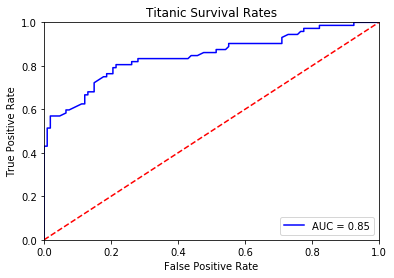

In [18]:
auc = roc_auc_score(Y_test,probabilities)
fpr,tpr,threshold = roc_curve(Y_test,probabilities)
plt.title('Titanic Survival Rates')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The calculated AUC value is .85 which is good as it's high, which means the model is doing a good job of classifying the dependent variable.

9.) Now want to calculate the optimal threshold probability, and use this to convert the predicted probabilities to predicted 1's and 0's for predicted survival rate.

In [19]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
optimal_threshold

0.32556377039200574

The optimal threshold turns out to be .326.  Now can make new predictions, and classify survival = 1 if probability above this value.

In [20]:
new_predictions = np.where(probabilities > optimal_threshold,1,0)

10.) Now calcualte the confusion matrix to see how well the model classified

In [21]:
new_confusion_mat = confusion_matrix(Y_test, new_predictions)
new_confusion_df = pd.DataFrame(new_confusion_mat,index=['Actual No','Actual Yes'],columns=['Predicted No','Predicted Yes'])
new_confusion_df

,Predicted No,Predicted Yes
Actual No,84,23
Actual Yes,15,57


11.) Can calculate Accuracy to evaluate the results.

In [22]:
accuracy_score(Y_test,new_predictions)

0.7877094972067039

The calculated Accuracy is .788, which is great!  This is how many evaluations are being 
classified correctly out of the total # of observations in test dataset.